In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

### Pre-processing

In [113]:
# Reading the Training Data
df = pd.read_csv("/kaggle/input/stroke-prediction-by-123-of-ai-dec-2023/stroke_train_set.csv")

In [11]:
# 1. Displaying the first 10 records
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4088.000000,4088.000000,4088.000000,4088.000000,3926.000000,4088.000000
mean,43.143395,0.098092,0.054550,106.098173,28.937061,0.048924
std,22.559356,0.297475,0.227127,45.313054,7.942361,0.215735
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.287500,23.600000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.027500,33.100000,0.000000
max,82.000000,1.000000,1.000000,267.760000,97.600000,1.000000


In [93]:
# 2. Check dataset info - field types, non-null values, dtypes
df.info()
# df["work_type"].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4088 entries, 0 to 4087
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4088 non-null   object 
 1   age                4088 non-null   float64
 2   hypertension       4088 non-null   int64  
 3   heart_disease      4088 non-null   int64  
 4   ever_married       4088 non-null   object 
 5   work_type          4088 non-null   object 
 6   Residence_type     4088 non-null   object 
 7   avg_glucose_level  4088 non-null   float64
 8   bmi                3926 non-null   float64
 9   smoking_status     4088 non-null   object 
 10  stroke             4088 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 351.4+ KB


In [114]:
# 3a. Pre-processing (Cleaning): Address missing (NULL) values - drop or imputation
# first try dropping non-null and then we can compare this with mean replacements if neeeded : bmi has only null values

def drop_data_na(dframe):
    print("dropping null data")
    data_null_rows = dframe[dframe.isnull().any(axis=1)]
    non_null_df = dframe.dropna() 
    return non_null_df

def fill_data_na(dframe,colname):
    dframe[colname] = dframe[colname].fillna(dframe[colname].mean())
    return dframe

print(f"Before={df.shape[0]}")
df = fill_data_na(df,'bmi')
print(f"After={df.shape[0]}")

Before=4088
After=4088


In [115]:
# 3b. Pre-processing (Cleaning): Remove Duplicate Rows
def drop_dups(dframe):
    print("dropping duplicate data")
    dframe = dframe.drop_duplicates(subset=None)
    return dframe

# no duplicates found to be dropped
print(f"Before={df.shape[0]}")
df = drop_dups(df)
print(f"After={df.shape[0]}")

Before=4088
dropping duplicate data
After=4088


In [ ]:
# 3c. Pre-processing (Cleaning): Drop irrelevant columns (that you don't want to give as input to the model)
# df = df.drop(columns=["id"])
# lets not drop anything for now untill we understand the relationships :

In [116]:
print(df['gender'].value_counts())
print(df['smoking_status'].value_counts())
print(df['ever_married'].value_counts())
print(df['Residence_type'].value_counts())
print(df['stroke'].value_counts())

gender
Female    2396
Male      1691
Other        1
Name: count, dtype: int64
smoking_status
never smoked       1517
Unknown            1239
formerly smoked     698
smokes              634
Name: count, dtype: int64
ever_married
Yes    2672
No     1416
Name: count, dtype: int64
Residence_type
Urban    2096
Rural    1992
Name: count, dtype: int64
stroke
0    3888
1     200
Name: count, dtype: int64


<Axes: xlabel='stroke'>

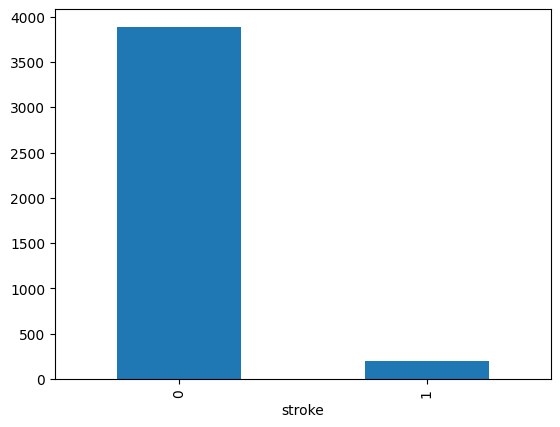

In [83]:
# df["gender"].value_counts().plot(kind='bar')
# df["hypertension"].value_counts().plot(kind='bar')
# df["heart_disease"].value_counts().plot(kind='bar')
# df["work_type"].value_counts().plot(kind='bar')
df["stroke"].value_counts().plot(kind='bar')

In [117]:
# 3d. Pre-processing (Encoding): Convert categorical values to numeric
# Use df['col_name'].value_counts() to find out all the categories available per column
def perform_1hotencoding(dframe,cat_columns):
    df_revised = pd.get_dummies(dframe, columns = cat_columns) # Pandas function to convert 'objects' (categorical) to one-hot (new col per category)
    return df_revised

def convert_categorical_to_numeric(dframe,cat_columns):
    for column in dframe.columns:
        for cat_col_name in cat_columns:
            if column.startswith(cat_col_name):
                dframe[column] = dframe[column].astype(int)
    return dframe
    
categorical_columns = ['gender','work_type','ever_married','Residence_type','smoking_status']
df = perform_1hotencoding(df,categorical_columns)
df_revised = convert_categorical_to_numeric(df,categorical_columns)    

In [110]:
df_revised.mean()

age                                43.143395
hypertension                        0.098092
heart_disease                       0.054550
avg_glucose_level                 106.098173
bmi                                28.937061
stroke                              0.048924
gender_Female                       0.586106
gender_Male                         0.413650
gender_Other                        0.000245
work_type_Govt_job                  0.129159
work_type_Never_worked              0.003425
work_type_Private                   0.570450
work_type_Self-employed             0.162916
work_type_children                  0.134051
ever_married_No                     0.346380
ever_married_Yes                    0.653620
Residence_type_Rural                0.487280
Residence_type_Urban                0.512720
smoking_status_Unknown              0.303082
smoking_status_formerly smoked      0.170744
smoking_status_never smoked         0.371086
smoking_status_smokes               0.155088
dtype: flo

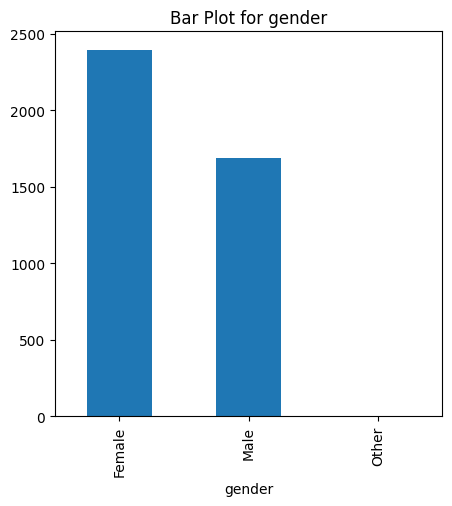

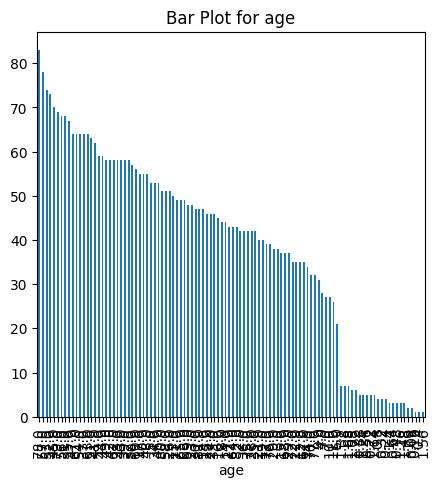

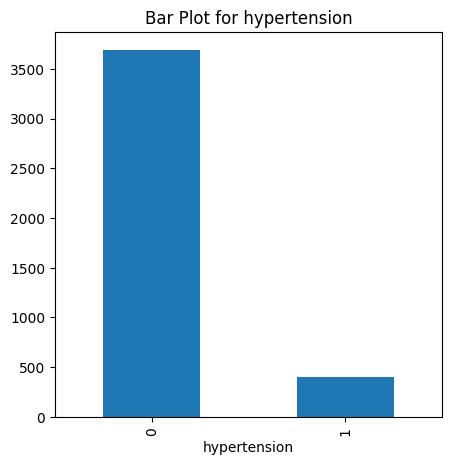

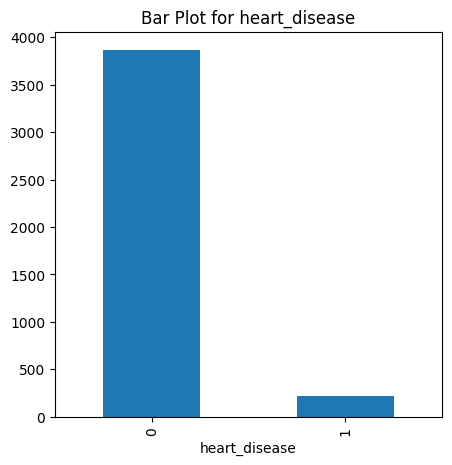

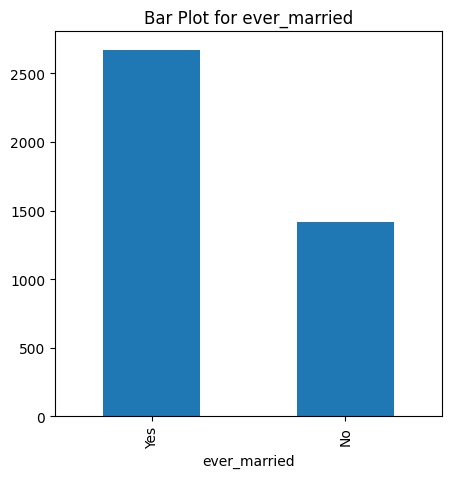

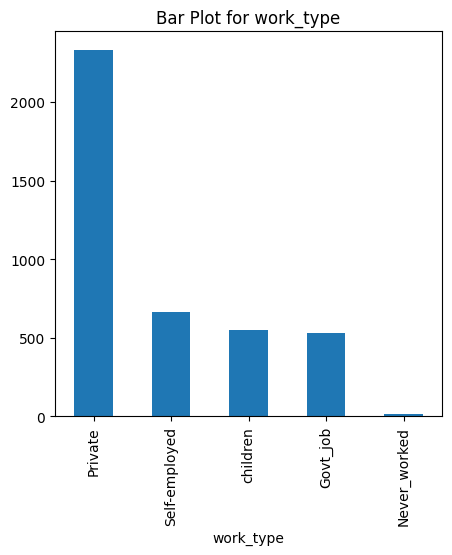

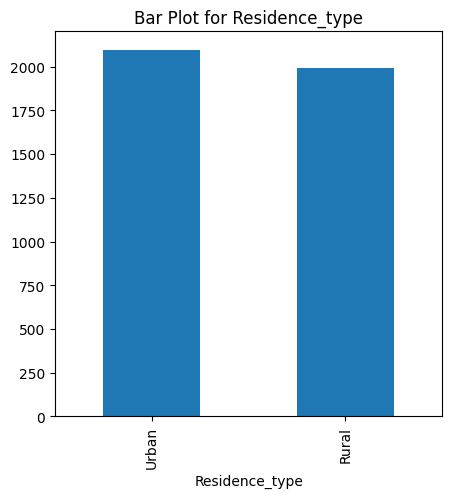

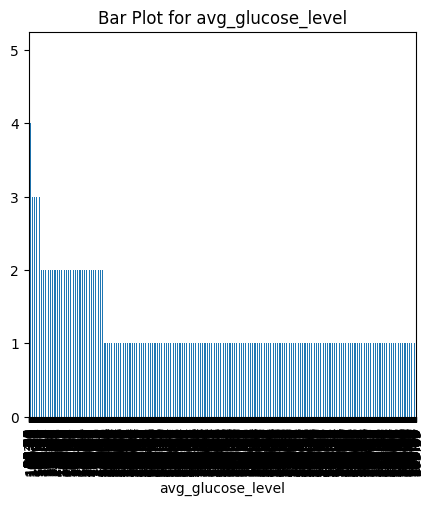

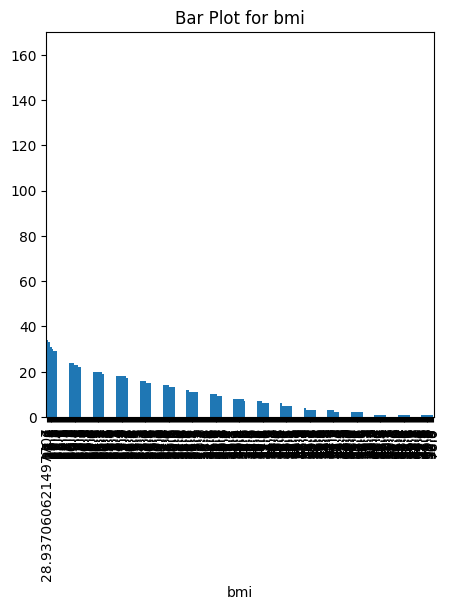

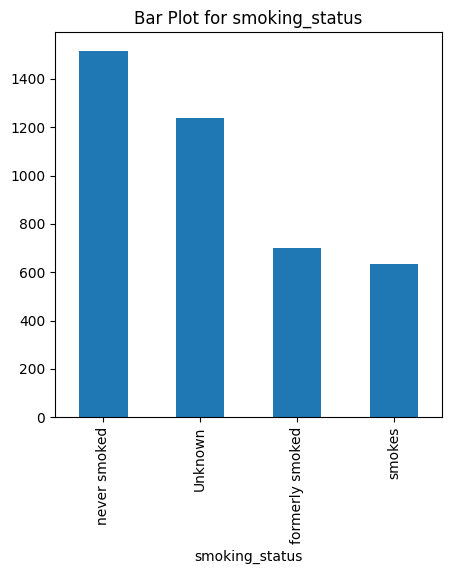

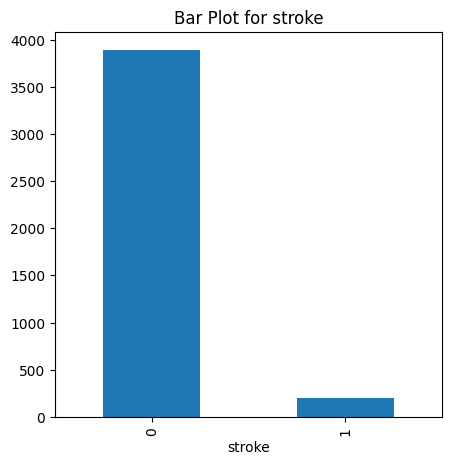

In [10]:
# 4b. Data understanding - Make use of plots to build more understanding of the data
# Hint: Can use df.plot()

# all individual lots
for feature in df.columns:
    plt.figure(figsize=(5, 5))
    df[feature].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot for {feature}')
    plt.show()

<Axes: xlabel='age_bin'>

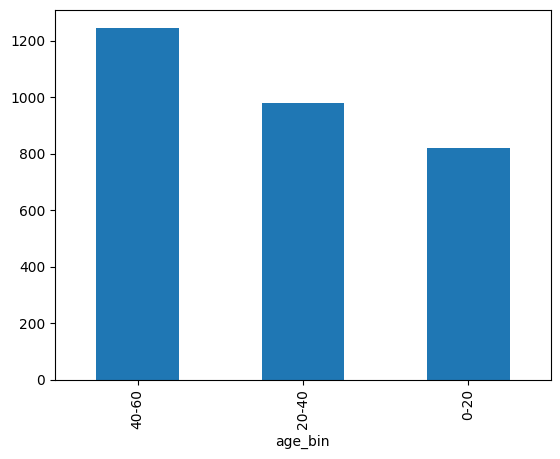

<Axes: xlabel='bmi_bin'>

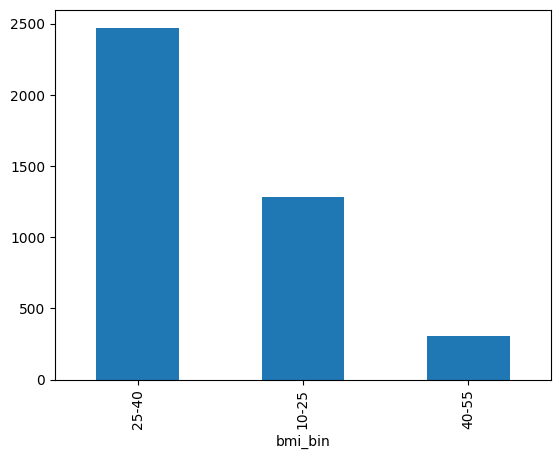

In [14]:
# # #handling bmi:
df_revised1 = df;
bins =  [i for i in range(10, 60, 15)]
labels = [str(bins[i]) + "-" + str(bins[i+1]) for i in range(len(bins)-1)]
df_revised1['bmi_bin'] = pd.cut(df['bmi'], bins=bins, labels=labels, include_lowest=True)
df_revised1['bmi_bin'].value_counts().plot(kind='bar')

# #handling age :
# df_revised1 = df_revised;
# bins =  [i for i in range(0, 75, 20)]
# labels = [str(bins[i]) + "-" + str(bins[i+1]) for i in range(len(bins)-1)]
# df_revised1['age_bin'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)
# df_revised1['age_bin'].value_counts().plot(kind='bar')

# #handling age :avg_glucose_level
# bins =  [i for i in range(40, 200, 50)]
# labels = [str(bins[i]) + "-" + str(bins[i+1]) for i in range(len(bins)-1)]
# df_revised1['avg_glucose_level_bin'] = pd.cut(df['avg_glucose_level'], bins=bins, labels=labels, include_lowest=True)
# df_revised1['avg_glucose_level_bin'].value_counts().plot(kind='bar')

In [102]:
df_revised.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,...,work_type_Self-employed,work_type_children,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,47.0,0,0,63.98,26.8,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1
1,54.0,0,0,86.26,35.1,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
2,3.0,0,0,68.34,18.0,0,1,0,0,0,...,0,1,1,0,1,0,1,0,0,0
3,62.0,0,0,226.38,47.4,0,1,0,0,0,...,0,0,0,1,1,0,0,0,1,0
4,27.0,0,0,85.60,21.4,0,1,0,0,0,...,0,0,0,1,1,0,1,0,0,0


(4088, 22)
(4088, 25)


,hypertension,heart_disease,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,...,smoking_status_smokes,age_bin_0-20,age_bin_20-40,age_bin_40-60,bmi_bin_10-25,bmi_bin_25-40,bmi_bin_40-55,avg_glucose_level_bin_40-90,avg_glucose_level_bin_90-140,avg_glucose_level_bin_140-190
0,0,0,0,0,1,0,0,0,1,0,...,1,0,0,1,0,1,0,1,0,0
1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0


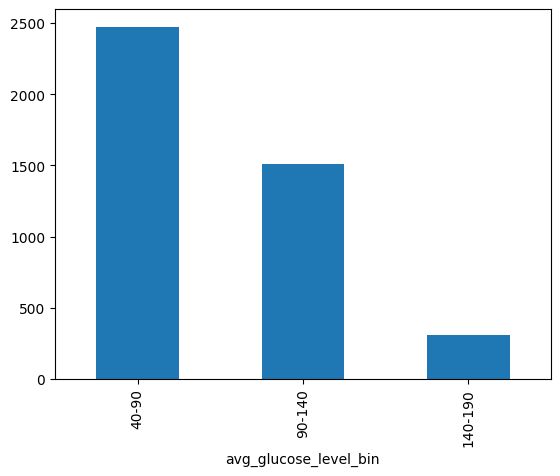

In [18]:
def add_bins(df):
    bins =  [i for i in range(0, 75, 20)]
    labels = [str(bins[i]) + "-" + str(bins[i+1]) for i in range(len(bins)-1)]
    df['age_bin'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)
   

    bins =  [i for i in range(10, 60, 15)]
    labels = [str(bins[i]) + "-" + str(bins[i+1]) for i in range(len(bins)-1)]
    df['bmi_bin'] = pd.cut(df['bmi'], bins=bins, labels=labels, include_lowest=True)
    df['bmi_bin'].value_counts().plot(kind='bar')

    bins =  [i for i in range(40, 200, 50)]
    labels = [str(bins[i]) + "-" + str(bins[i+1]) for i in range(len(bins)-1)]
    df['avg_glucose_level_bin'] = pd.cut(df['avg_glucose_level'], bins=bins, labels=labels, include_lowest=True)
    df['avg_glucose_level_bin'].value_counts().plot(kind='bar')

# print(df_revised.shape)    
# add_bins(df_revised)
# print(df_revised.shape)  


# remove older features
# df_revised.drop(columns=['age','bmi','avg_glucose_level'],inplace=True)

categorical_columns = ['age_bin','bmi_bin','avg_glucose_level_bin']
df_revised = perform_1hotencoding(df_revised,categorical_columns)
df_revised = convert_categorical_to_numeric(df_revised,categorical_columns)
df_revised.head()

In [29]:
df_revised.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,...,work_type_Self-employed,work_type_children,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,47.0,0,0,63.98,26.8,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1
1,54.0,0,0,86.26,35.1,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
2,3.0,0,0,68.34,18.0,0,1,0,0,0,...,0,1,1,0,1,0,1,0,0,0
3,62.0,0,0,226.38,47.4,0,1,0,0,0,...,0,0,0,1,1,0,0,0,1,0
4,27.0,0,0,85.60,21.4,0,1,0,0,0,...,0,0,0,1,1,0,1,0,0,0


<Axes: xlabel='avg_glucose_level_bin'>

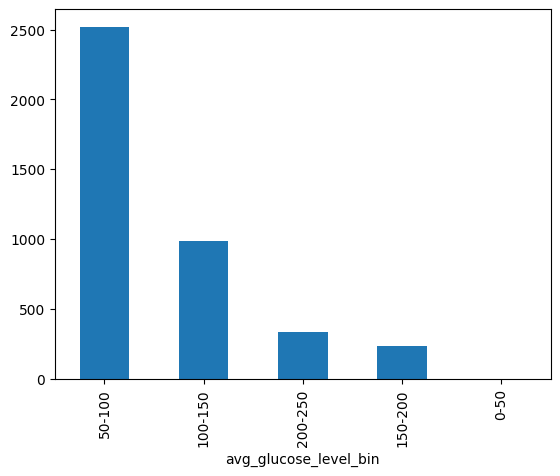

In [83]:
# bins =  [i for i in range(0, 300, 50)]
# labels = [str(bins[i]) + "-" + str(bins[i+1]) for i in range(len(bins)-1)]
# df['avg_glucose_level_bin'] = pd.cut(df_revised['avg_glucose_level'], bins=bins, labels=labels, include_lowest=True)
# df['avg_glucose_level_bin'].value_counts().plot(kind='bar')

### Obsersavations on test dataset
1.  gender : majority of the samples are of female gender
2.  hypertension and heart_disease : significant majority of no hypertension and no heart disease
3. ever_married : clear majority of the ever_married=true population
4. work_type : significant majority of the work_type as private
5. residence_type : Almost equal representation of both 
6. bmi, age, avg_glucose_level : might have to create bins and try as data is very sparse
  - based on bins, 
        - majority the samples are of age>30 and
        -  bmi between 20-40 and
        -  avg_glucose_level between 50-150
7. smoking_status : major cases fall in eithe never_smoked and unknown category

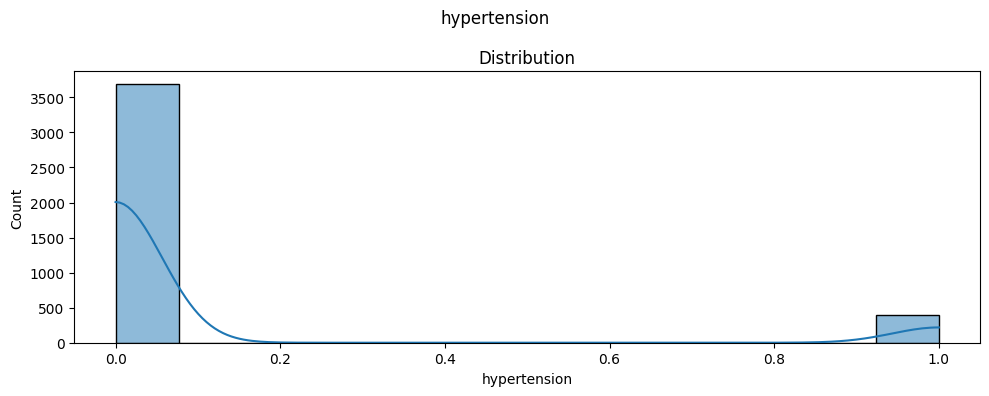

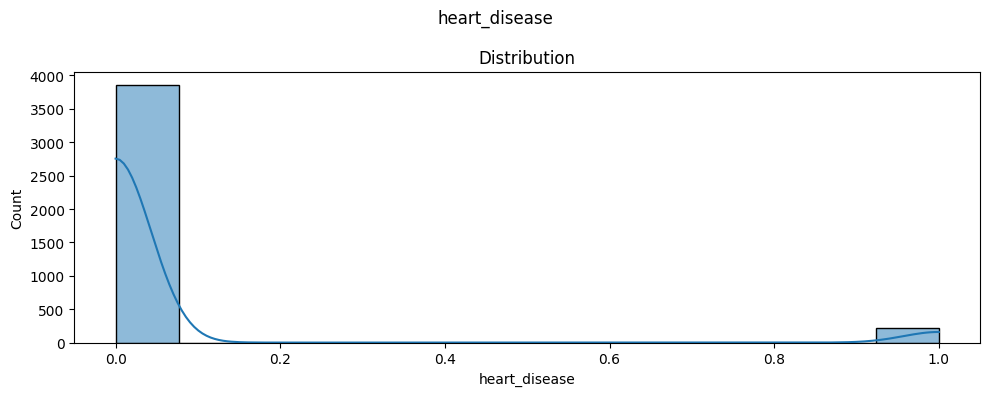

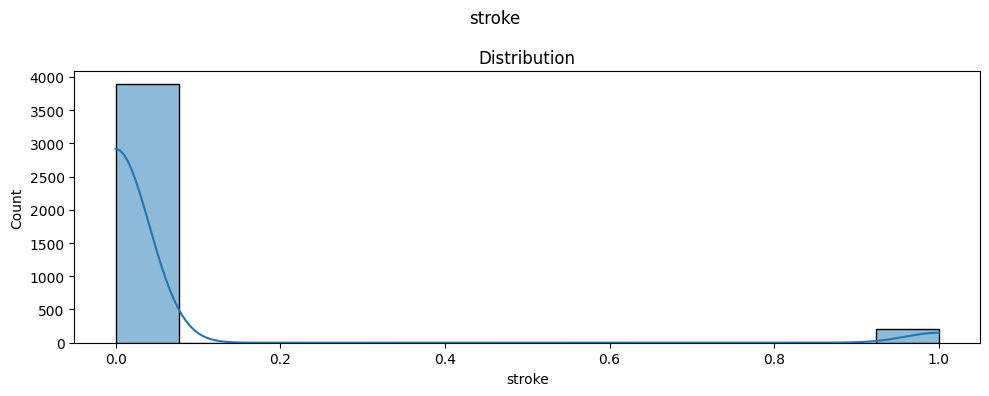

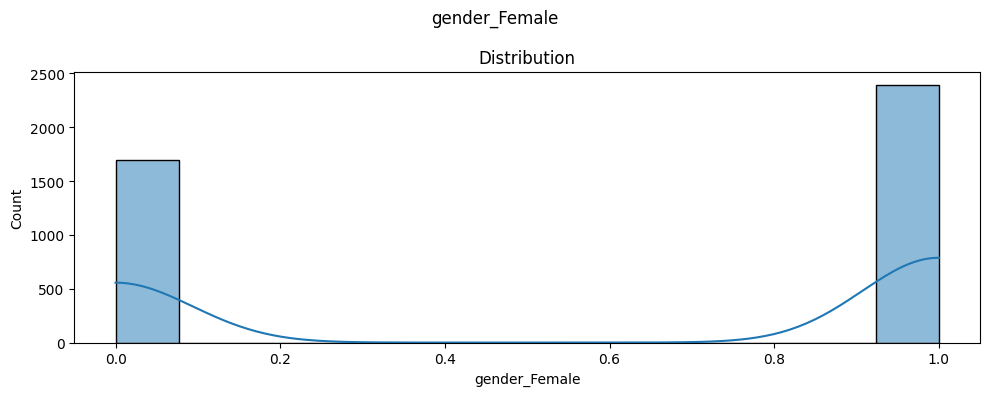

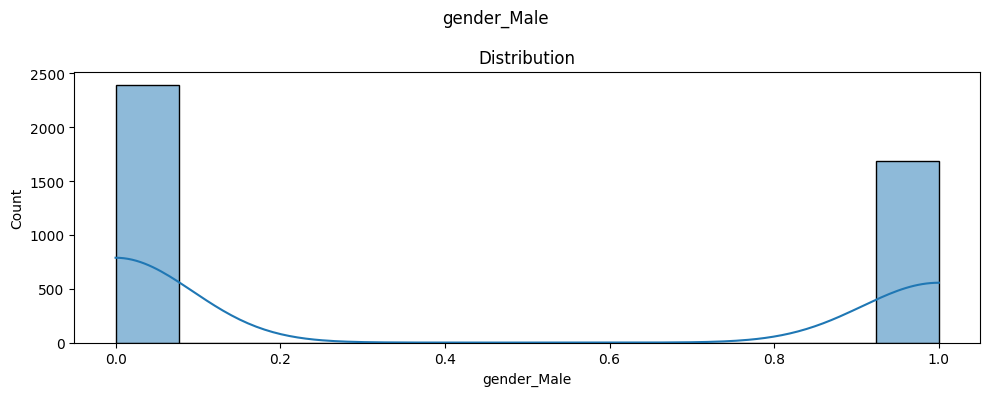

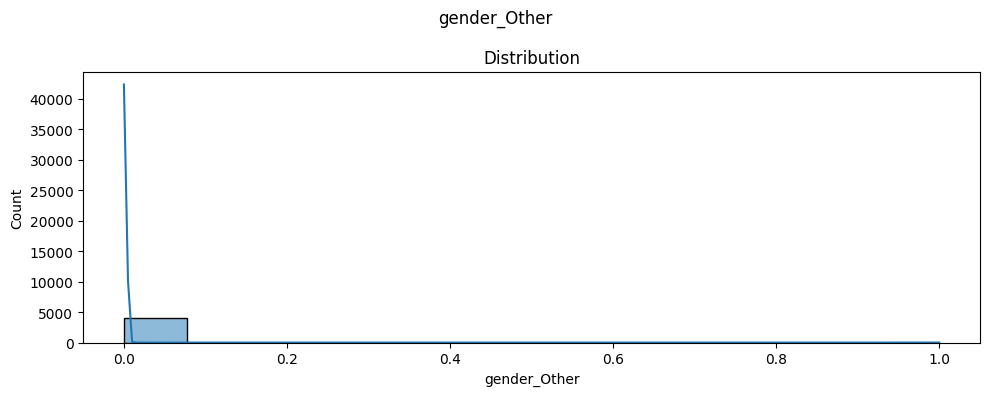

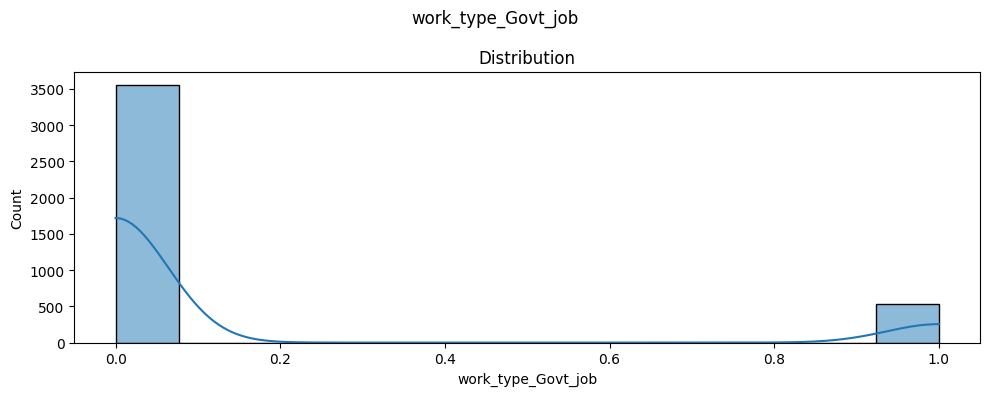

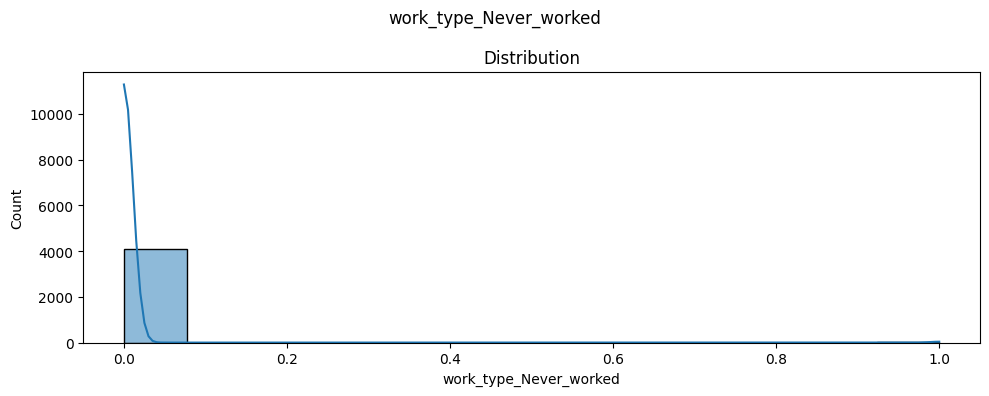

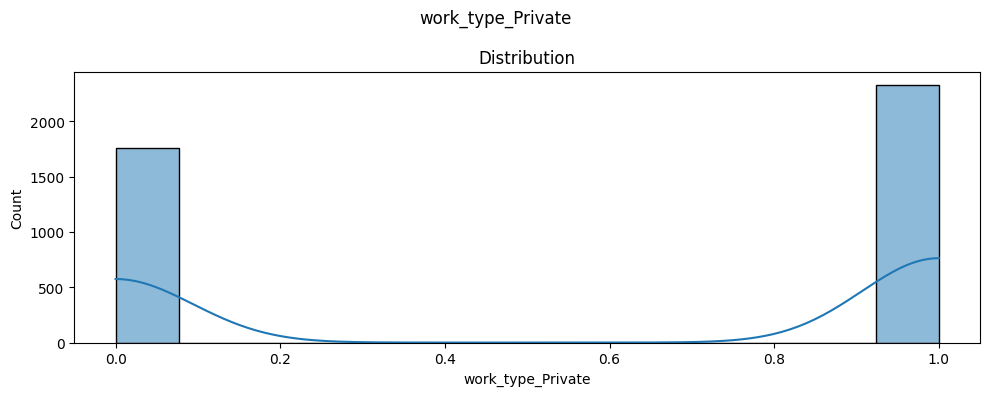

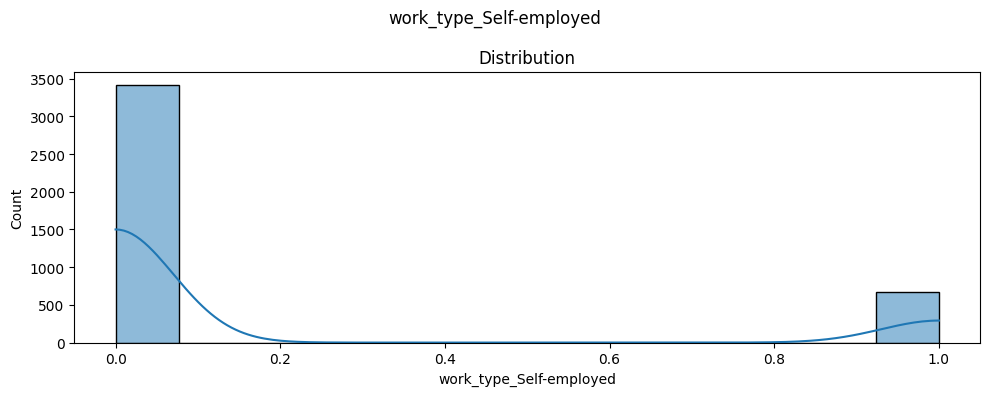

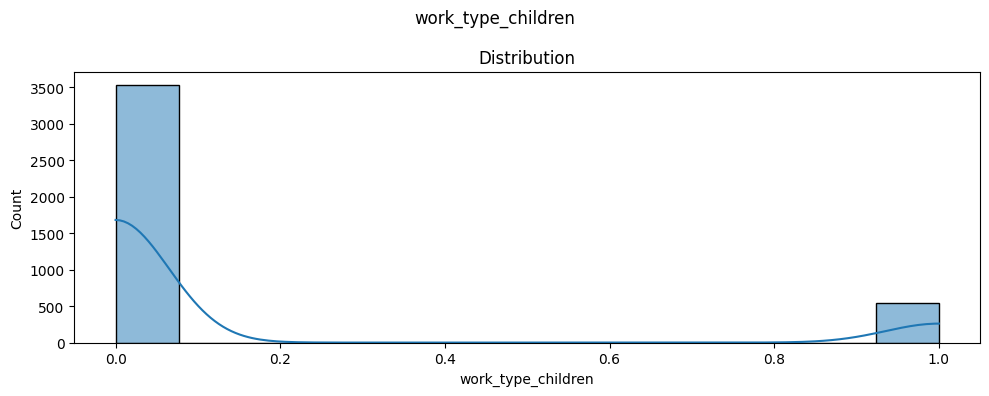

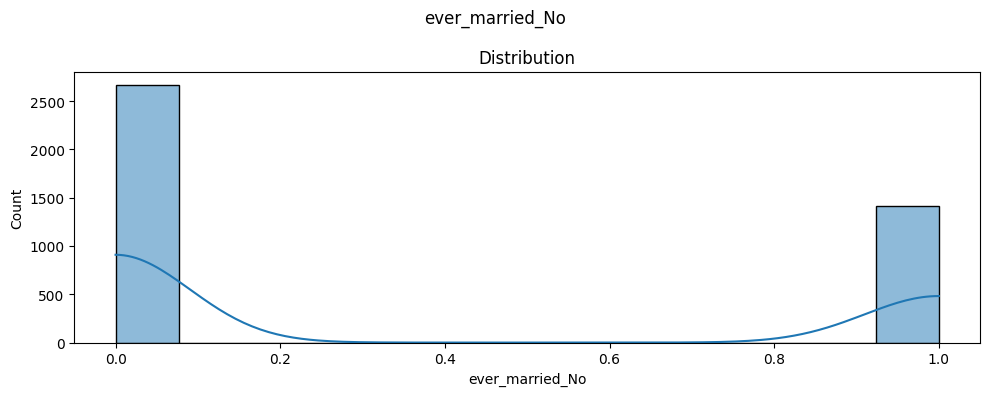

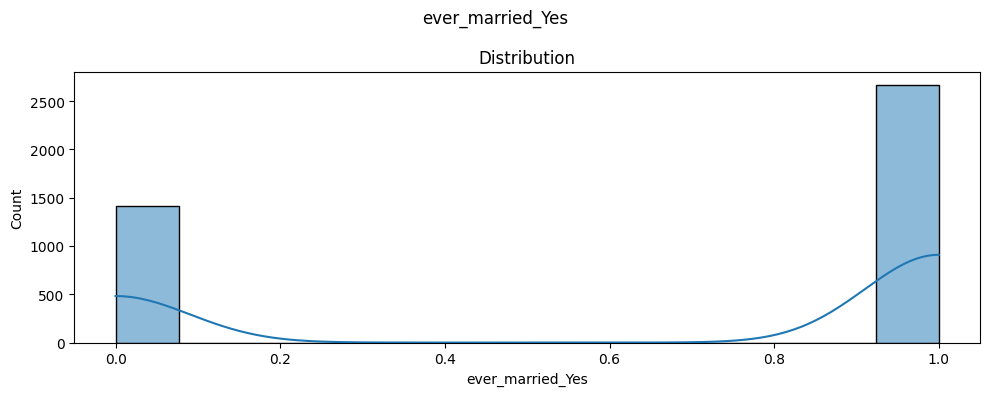

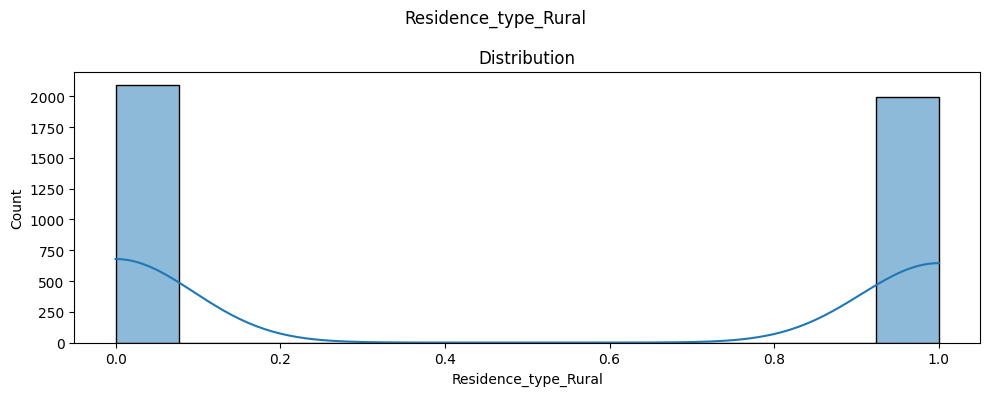

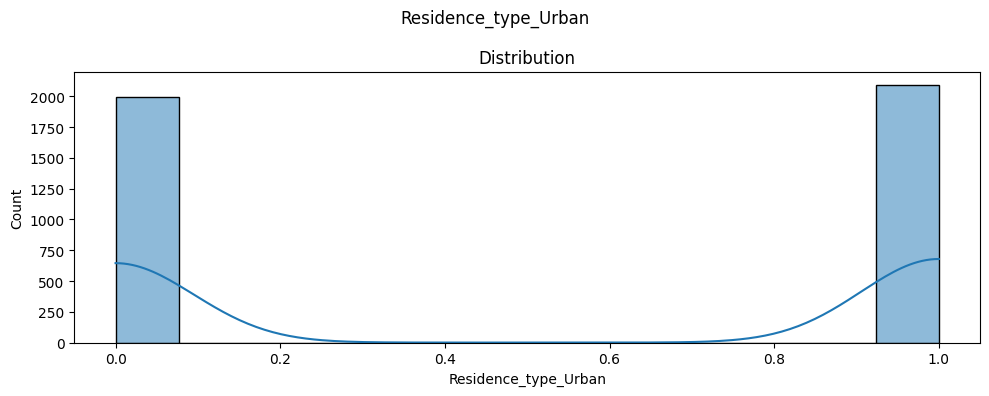

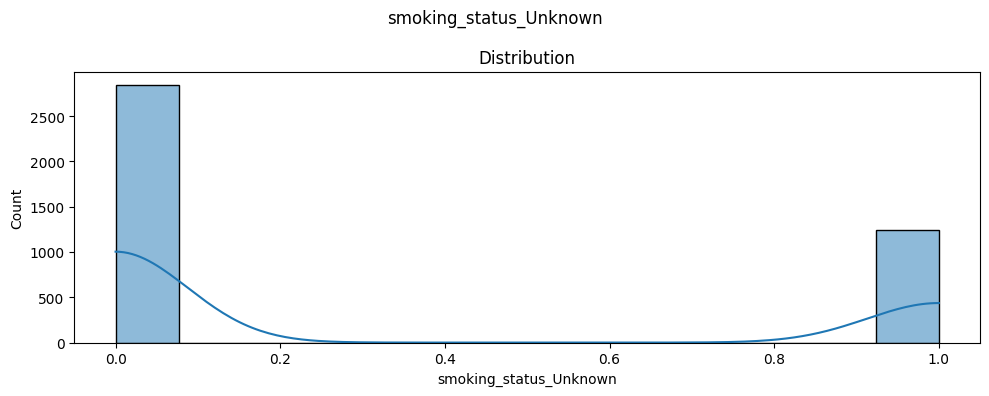

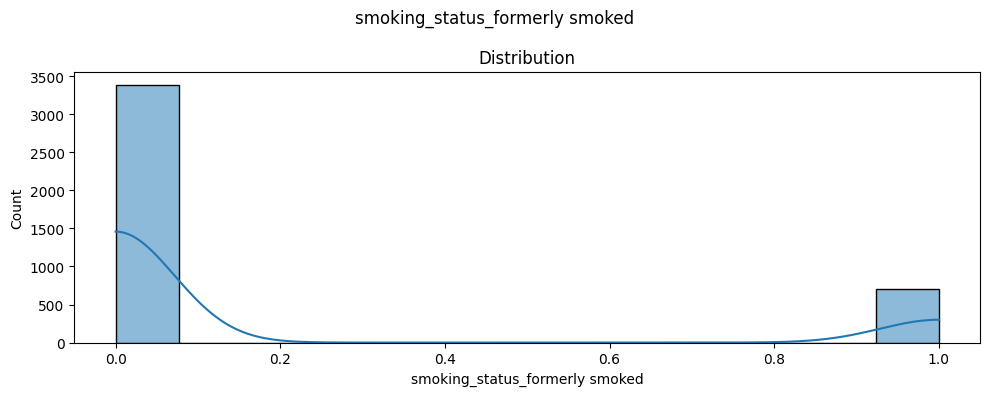

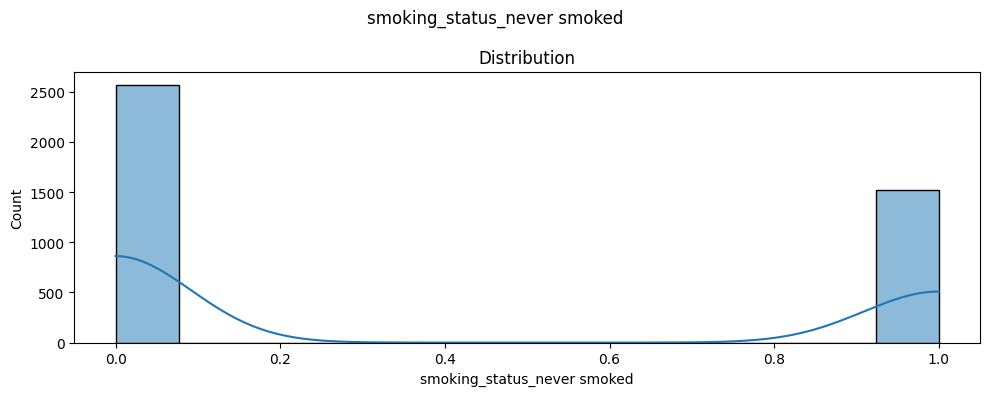

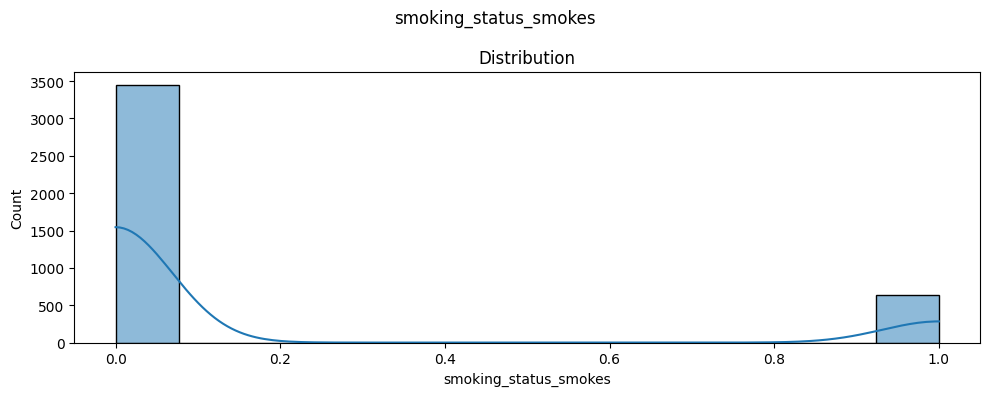

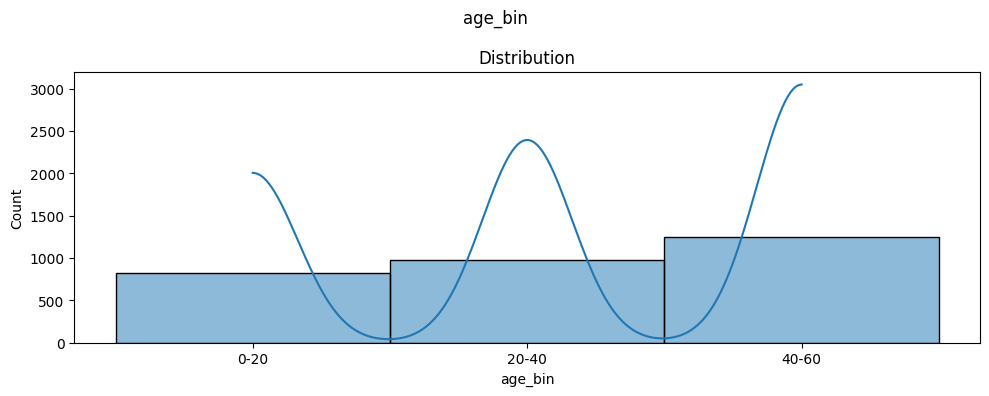

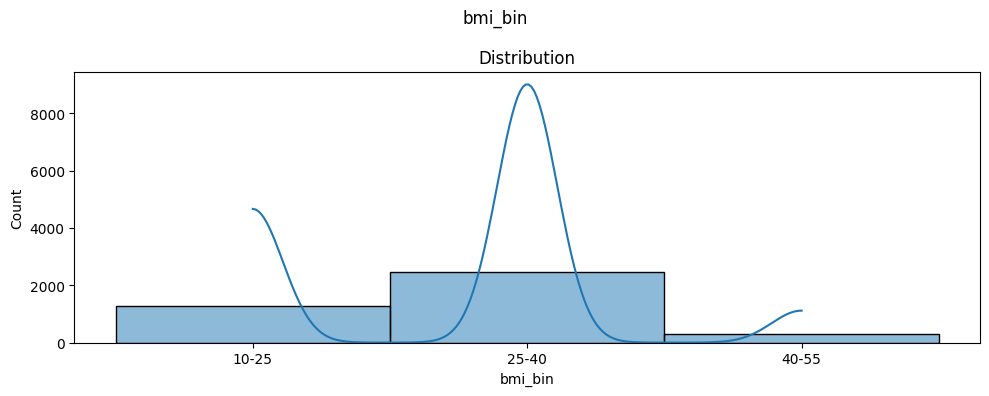

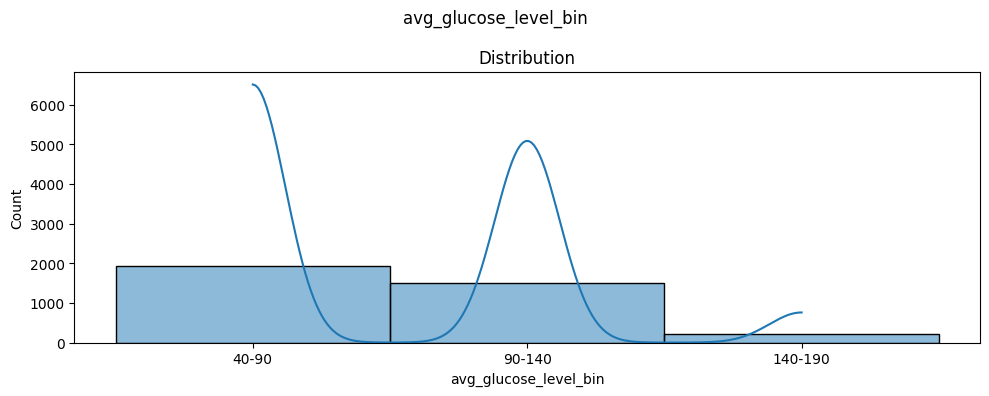

In [243]:
# 4b. (Optional) Create More plots to understand the relationship b/w different variables

# Example: Top 20 actors of movies based on the imdb rating of the movies

# plt.figure(figsize=(10, 8))

# # Create a new dataframe with top 20 values
# new_df = df.sort_values(by ='imdb_score' , ascending=False)
# new_df = new_df.head(20)

# # plotting
# ax=sns.pointplot(x=new_df['actor_1_name'], y=new_df['imdb_score'], hue=new_df['movie_title'])
# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# plt.tight_layout()
# plt.show()
data = df
i = 0
for column in data.columns:
    plt.figure(figsize=(10, 4))
    
    if data[column].dtype == 'object': # Categorical variable
        plt.subplot(1, 1, 1)
        sns.countplot(y=data[column], order=data[column].value_counts().index)
        plt.title('Frequency Count')
        
#         plt.subplot(1, 2, 2)
#         sns.barplot(y=data[column], x=data[column].value_counts())
#         plt.title('Proportion')
    else: # Numerical variable
        plt.subplot(1, 1, 1)
        sns.histplot(data=df, x=column, kde=True)
        plt.title('Distribution')
    i+=1
        
#         plt.subplot(1, 2, 2)
#         sns.boxplot(data=df, x=column)
#         plt.title('Boxplot')
        
    plt.suptitle(column)
    plt.tight_layout()
    plt.show()

In [84]:

df_revised.drop(columns=['gender_Other'],inplace=True)


KeyError: "['gender_Other'] not found in axis"

ValueError: could not convert string to float: 'Male'

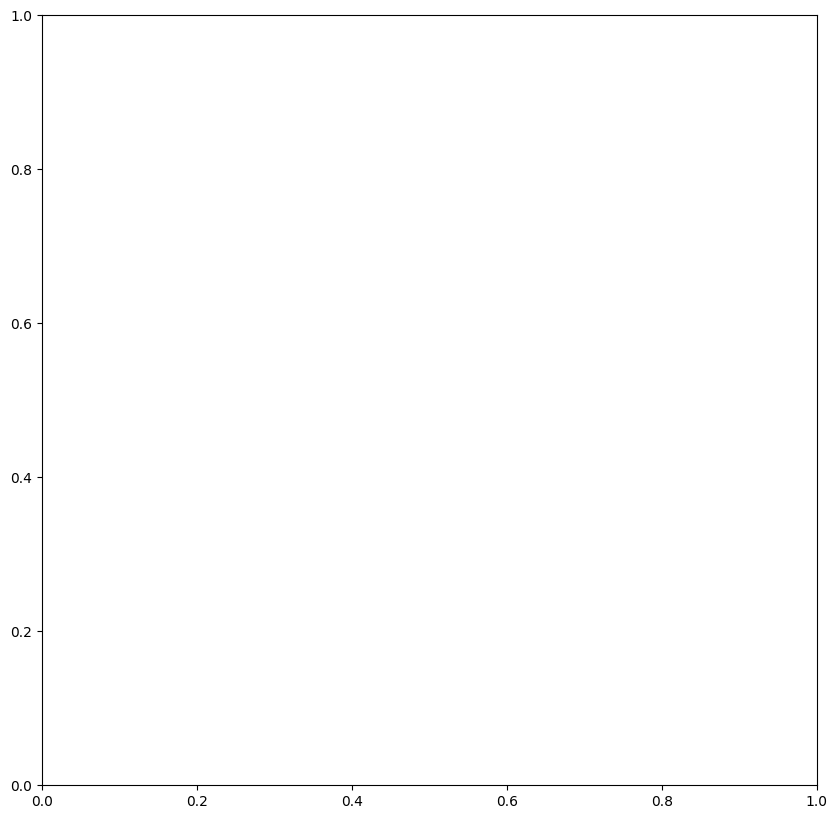

In [41]:
# 4c. Find out which input features are the most important
# Hint: Start out with df.corr(). Can visualise with seaborn library
# df_revised.head()
# colNames = ['age','bmi','avg_glucose_level']
# df_normalized = normalize_dataset(df_revised,colNames)
#correlation map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [37]:
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,47.0,0,0,Yes,Private,Urban,63.98,26.8,smokes,0
1,Male,54.0,0,0,Yes,Private,Urban,86.26,35.1,formerly smoked,0
2,Female,3.0,0,0,No,children,Rural,68.34,18.0,Unknown,0
3,Female,62.0,0,0,Yes,Private,Rural,226.38,47.4,never smoked,0
4,Female,27.0,0,0,Yes,Private,Rural,85.60,21.4,Unknown,0
5,Male,39.0,0,0,Yes,Private,Urban,164.67,33.8,Unknown,0
6,Female,47.0,0,0,Yes,Private,Rural,195.04,45.5,never smoked,0
7,Male,1.8,0,0,No,children,Urban,153.31,17.1,Unknown,0
8,Male,41.0,0,0,Yes,Private,Urban,104.34,30.3,Unknown,0
9,Female,47.0,0,0,Yes,Private,Urban,68.48,21.3,never smoked,0


In [118]:
# Any other relevant pre-processing (upto your exploration)

# normalize the values for agfe, bmi and avg_glucose_level

# ====================== commet for now================
from sklearn.preprocessing import StandardScaler

def normalize_dataset(dframe,columns):
    df_revised = dframe
    scaler = StandardScaler()
    for colName in columns:
        df_revised[[colName]] = scaler.fit_transform(df_revised[[colName]])
    df_revised[['bmi']] = scaler.fit_transform(df_revised[['bmi']])
    df_revised[['avg_glucose_level']] = scaler.fit_transform(df_revised[['avg_glucose_level']])
    return df_revised

# colNames = ['age','bmi','avg_glucose_level']
df_normalized = normalize_dataset(df_revised,colNames)
# df_normalized.head()
# ======================
# df_normalized = df_revised 
df_normalized.mean()

age                              -1.042871e-16
hypertension                      9.809198e-02
heart_disease                     5.454990e-02
avg_glucose_level                -1.911930e-17
bmi                               1.390495e-17
stroke                            4.892368e-02
gender_Female                     5.861057e-01
gender_Male                       4.136497e-01
gender_Other                      2.446184e-04
work_type_Govt_job                1.291585e-01
work_type_Never_worked            3.424658e-03
work_type_Private                 5.704501e-01
work_type_Self-employed           1.629159e-01
work_type_children                1.340509e-01
ever_married_No                   3.463796e-01
ever_married_Yes                  6.536204e-01
Residence_type_Rural              4.872798e-01
Residence_type_Urban              5.127202e-01
smoking_status_Unknown            3.030822e-01
smoking_status_formerly smoked    1.707436e-01
smoking_status_never smoked       3.710861e-01
smoking_statu

### Model Development

In [111]:
# 1. Divide dataframe into input and output
X = df_normalized.drop(columns=['stroke']) 
y = df_normalized['stroke'] 
# df_revised = df_normalized

# X = df.drop(columns=['stroke']) 
# y = df['stroke'] 


from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=37)

# Fit the resampled data to the model
X_resampled, y_resampled = smote.fit_resample(X, y)
X = X_resampled
y = y_resampled

In [112]:
X.mean()
# X_resampled["gender"].value_counts().plot(kind='bar')
# df["hypertension"].value_counts().plot(kind='bar')
# df["heart_disease"].value_counts().plot(kind='bar')
# df["work_type"].value_counts().plot(kind='bar')
# y_resampled["stroke"].value_counts().plot(kind='bar')

age                               0.504672
hypertension                      0.095936
heart_disease                     0.070473
avg_glucose_level                 0.298583
bmi                               0.060789
gender_Female                     0.567130
gender_Male                       0.397505
gender_Other                      0.000129
work_type_Govt_job                0.092850
work_type_Never_worked            0.001800
work_type_Private                 0.571373
work_type_Self-employed           0.164095
work_type_children                0.071759
ever_married_No                   0.206790
ever_married_Yes                  0.764532
Residence_type_Rural              0.439429
Residence_type_Urban              0.508873
smoking_status_Unknown            0.218750
smoking_status_formerly smoked    0.181070
smoking_status_never smoked       0.336163
smoking_status_smokes             0.130530
dtype: float64

In [72]:
df_revised.shape

(4088, 21)

In [53]:
# ====================== hold
# feature selection
from sklearn.feature_selection import f_regression, SelectKBest,mutual_info_classif

# feature_names = dataset['feature_names']
print(X.shape)

# kbest_regression = None
# kbest_minfo = None

def select_kbest_regression(X,y, n):
    kbest_regression = SelectKBest(f_regression, k=n)
    X_limited_features = kbest_regression.fit_transform(X, y)
    chosen_features = kbest_regression.get_feature_names_out()
    print(chosen_features)
    print(X_limited_features.shape)
    return (X_limited_features,kbest_regression)

# 2. Perform Feature Selection - Experiment with the best one!
def select_kbest_minfo(X,y,n):
    kbest_minfo = SelectKBest(mutual_info_classif, k=n)
    kbest_minfo.fit(X,y)
    X_limited_features = kbest_minfo.transform(X)
#     X_limited_features = kbest_minfo.fit_transform(X, y)
    chosen_features = kbest_minfo.get_feature_names_out()
    print(chosen_features)
    print(type(X_limited_features))
    return (X_limited_features, kbest_minfo)


(4088, 20)


In [70]:
# 3. Data Normalisation: Bring into the range 0 to 1, or -1 to 1
# already done in data preprocessing step

X.shape

(7776, 20)

In [68]:
# 4. Choose Model(s), fit
### Experiment with different models.
### https://scikit-learn.org/stable/supervised_learning.html
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,mean_squared_error, accuracy_score

# select_kbest_minfo
# select_kbest_regression
# X_limited_features, kbest_minfo = select_kbest_minfo(X,y,8)
# X_limited_features = select_kbest_regression(X,y,8)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# model = LogisticRegression()
model = LogisticRegression(penalty='l2', C=0.2,max_iter=1000)


In [ ]:
# ====================== hold
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC
# param_grid = {
#     'C': [0.1, 1, 10],
#     'gamma': [1, 0.1],
#     'kernel': ['rbf', 'poly', 'sigmoid']
# }
# svc = SVC()
# clf = GridSearchCV(svc, param_grid)

# ======================

In [ ]:
# ====================== hold
# clf.fit(x_train, y_train)
# y_pred = clf.predict(x_test)
# print(clf.score(x_test, y_test))
# print(accuracy_score(y_test,y_pred))
# mse = mean_squared_error(y_test, y_pred)
# print('Mean Squared Error:', mse)
# ======================

In [69]:
# 5. Evaluate with relevant metric for your problem. Eg: accuracy_score(), r2_score()
# print(x_train)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(model.score(x_test, y_test))
print(accuracy_score(y_test,y_pred))
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

0.9537275064267352
0.9537275064267352
Mean Squared Error: 0.04627249357326478


In [104]:
# 6. After model choice is made, fine-tune with GridSearchCV, or RandomizedSearchCV()

# ====================== hold
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# # Define the hyperparameter grid
# param_grid = {
#     'n_estimators': [10, 20, 30],
#     'max_depth': [None, 10, 20,],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }
# # parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100,],
# #               'max_iter': [100, 200, 300, 400]}

# # Create a RandomForestClassifier
# rfc = RandomForestClassifier()

# # Create a GridSearchCV object
# grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1)

# # Fit the GridSearchCV object to the data
# grid_search.fit(X_limited_features, y)

# # Get the best model
# best_model = grid_search.best_estimator_

# # Get the best parameters
# best_params = grid_search.best_params_

# print(best_model)
# print(best_params)

# ====================== hold

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=20)
{'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 20}


In [93]:
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.170975,0,0,-0.929607,-0.274601,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1
1,0.481305,0,0,-0.437856,0.791906,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0
2,-1.779674,0,0,-0.833376,-1.405357,1,0,0,0,0,0,1,1,0,1,0,1,0,0,0
3,0.835969,0,0,2.654788,2.372394,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0
4,-0.715684,0,0,-0.452423,-0.968474,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0


In [251]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=20)
print(x_train.shape)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

print(rfc.score(x_test, y_test))
print(accuracy_score(y_test,y_pred))

(6220, 26)
0.8913881748071979
0.8913881748071979


(1022, 26)


,hypertension,heart_disease,gender_Female,gender_Male,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,ever_married_No,...,smoking_status_smokes,age_bin_0-20,age_bin_20-40,age_bin_40-60,bmi_bin_10-25,bmi_bin_25-40,bmi_bin_40-55,avg_glucose_level_bin_40-90,avg_glucose_level_bin_90-140,avg_glucose_level_bin_140-190
0,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,1,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,0,1,0,0,1,...,0,0,0,1,0,1,0,1,0,0
3,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


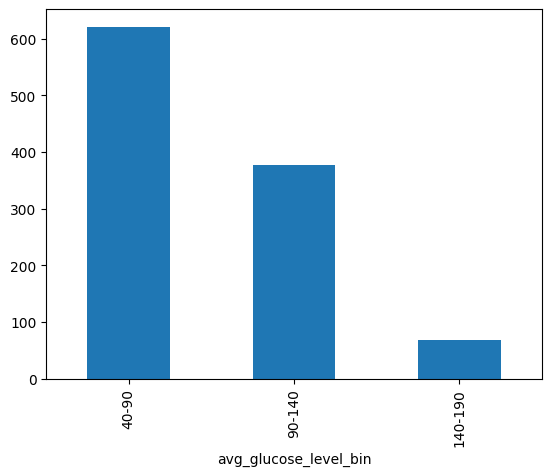

In [252]:
# Usually, we do a train-test split, but, in the hackathon, we'll already provide you with the separate datasets for each

test_df = pd.read_csv("/kaggle/input/stroke-prediction-by-123-of-ai-dec-2023/stroke_test_set_nogt.csv")


test_df['bmi'].fillna(test_df['bmi'].mean(), inplace=True)

categorical_columns = ['gender','work_type','ever_married','Residence_type','smoking_status']
test_df = perform_1hotencoding(test_df,categorical_columns)
test_df = convert_categorical_to_numeric(test_df,categorical_columns)

# print('original shae',test_df.shape)

# test_df = drop_data_na(test_df)
# print('after dropping na',test_df.shape)

# test_df= drop_dups(test_df)  
add_bins(test_df)
# 
test_df.drop(columns=['age','bmi','avg_glucose_level'],inplace=True)

categorical_columns = ['age_bin','bmi_bin','avg_glucose_level_bin']
test_df = perform_1hotencoding(test_df,categorical_columns)
test_df = convert_categorical_to_numeric(test_df,categorical_columns)

print(test_df.shape)  


# remove older features
# test_df.drop(columns=['age','bmi','avg_glucose_level'],inplace=True)

# categorical_columns = ['age_bin','bmi_bin','avg_glucose_level_bin']
# test_df = perform_1hotencoding(test_df,categorical_columns)
# test_df = convert_categorical_to_numeric(df,categorical_columns)


# test_df = test_df.drop('gender_Other',axis=1)


# colNames = ['age','bmi','avg_glucose_level']
# test_df_normalized = normalize_dataset(test_df,colNames)
# test_df_normalized = test_df
test_df.head()

# test_df.shape
# X["gender_Other"].value_counts().plot(kind='bar')
# print(type(test_df_normalized))
# X_test_transformed.head()

In [255]:
# use 



# y_pred = rfc.predict(test_df_normalized)
# print(y_pred.size)

#use LR 
# X_limited_features = kbest_minfo.transform(test_df_normalized)
# X_limited_features = select_kbest_minfo(test_df_normalized,y,5)
# test_df_normalized= X_limited_features
y_pred = model.predict(test_df)
print("Test data accuracy:", len(y_pred[y_pred>0]))


Test data accuracy: 129


### Testing and Creating Output CSV

In [206]:
# Creating output file for submission - Template Code

# test_pd = pd.read_csv('/kaggle/working/submission.csv')
# test_pd.head()

# # saving in a new variable to modify
# test = test_pd.copy(deep=True)

# # Prepare data to be given as an input to your trained model
# # 1. Repeat the pre-processing done above. Eg: Conversion to categorical, filling in mean values
# test['bmi'].fillna(test['bmi'].mean(), inplace=True)
# test = pd.get_dummies(test)

# # 2. Use the same features obtained in feature selection
# chosen_features = feat_selector.get_feature_names_out() # from above -> getting names of chosen features
# test = test[chosen_features]

# # 3. Normalise/Scale the features as done above


# # 4. Predict and obtain results from the model
# y_pred = model.predict(test)

# 5. Save results to CSV
submission = pd.DataFrame({'ID': test_df.index, 'stroke' : y_pred})
print(submission)
submission.to_csv('submission.csv', index=False)

        ID  stroke
0        0       0
1        1       1
2        2       0
3        3       1
4        4       1
...    ...     ...
1017  1017       0
1018  1018       1
1019  1019       0
1020  1020       0
1021  1021       1

[1022 rows x 2 columns]
